In [1]:
import pandas as pd
from tokenizers import SimpleTokenizer
from sentiment_analyzer import SimpleSentimentAnalyzer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./resources/sample_data/reddit-comments-2015-08.csv')

In [3]:
df.head()

,body
0,I joined a new league this year and they have ...
1,"In your scenario, a person could just not run ..."
2,They don't get paid for how much time you spen...
3,"I dunno, back before the August update in an A..."
4,"No, but Toriyama sometimes would draw himself ..."


In [4]:
tokenizer = SimpleTokenizer()
tokenize = lambda x: tokenizer.tokenize(x)

In [5]:
df['tokens'] = df['body'].apply(tokenize)

In [6]:
df.head()

,body,tokens
0,I joined a new league this year and they have ...,"[joined, league, scoring, rules, slight, ppr, ..."
1,"In your scenario, a person could just not run ...","[scenario, person, mandatory, background, chec..."
2,They don't get paid for how much time you spen...,"[paid, time, spend, building, army, paid, gem,..."
3,"I dunno, back before the August update in an A...","[dunno, august, update, lobby, tower, control,..."
4,"No, but Toriyama sometimes would draw himself ...","[toriyama, draw, robot, shen, funny, character..."


In [18]:
sa = SimpleSentimentAnalyzer()
score_sentiment = lambda x: sa.score(x)

In [19]:
df['sent_score'] = df['tokens'].apply(lambda x: sa.score(x))

In [21]:
df['sent_score'].sum()

-11603

In [22]:
df['sent_score'].mean()

-0.7735333333333333

In [23]:
df['sent_score'].median()

0.0

In [33]:
df.head()

,body,tokens,sent_score
0,I joined a new league this year and they have ...,"[joined, league, scoring, rules, slight, ppr, ...",-1
1,"In your scenario, a person could just not run ...","[scenario, person, mandatory, background, chec...",-7
2,They don't get paid for how much time you spen...,"[paid, time, spend, building, army, paid, gem,...",2
3,"I dunno, back before the August update in an A...","[dunno, august, update, lobby, tower, control,...",-5
4,"No, but Toriyama sometimes would draw himself ...","[toriyama, draw, robot, shen, funny, character...",-1


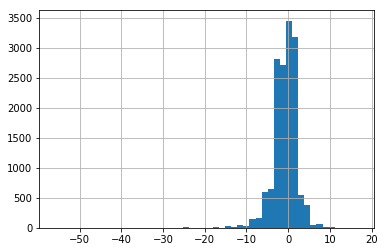

In [37]:
df['sent_score'].hist(bins=50)

In [5]:
def get_wordlist(path):
    with open(path) as f:
        words = []
        for line in f:
            words.append(line.strip())
        return words

In [43]:
pos_words = get_wordlist('./resources/new_pos_words')
neg_words = get_wordlist('./resources/new_neg_words')
stop_words = get_wordlist('./resources/stopwords')

In [44]:
print('Positive Word Length: {}'.format(len(set(pos_words))))
print('Negative Word Length: {}'.format(len(set(neg_words))))
print('Stop Word Length: {}'.format(len(set(stop_words))))

Positive Word Length: 1963
Negative Word Length: 4770
Stop Word Length: 172


In [19]:
new_pos_words = [x for x in pos_words if x not in stop_words]

In [20]:
new_neg_words = [x for x in neg_words if x not in stop_words]

In [45]:
pos_and_neg = set(pos_words) & set(neg_words)
stop_and_neg = set(stop_words) & set(neg_words)
pos_and_stop = set(pos_words) & set(stop_words)

In [48]:
set(pos_words) & set(neg_words)

set()

In [34]:
def write_list_to_file(words, path):
    with open(path, 'w') as f:
        for word in words:
            f.write(word + "\n")

In [39]:
write_list_to_file(new_pos_words, './resources/new_pos_words')